# Model analisis sentimen ulasan aplikasi mobile legends - Muhamad Rifqi Afriansyah


# Melakukan import library yang dibutuhkan untuk keseluruhan proyek.

In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import requests
import csv
from io import StringIO
import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

## Melakukan read dataset dan menyimpannya di variabel data.

In [4]:
# Read dataset
data = pd.read_csv('/content/ulasan_mobile_legends.csv')

## Menampilkan lima data teratas dari dataset.

In [5]:
# Menampilkan lima data teratas.
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,af25da00-89b3-4b25-84ba-5fb9706bda83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sepandai apapun kalian bermain,, monoton akan ...",2.0,2096.0,1.9.29.10113,2024-11-14 11:28:50,NaN,NaN,1.9.29.10113
1,32fff8c0-e93a-48bb-8074-0b7a06727a61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sih tapi cuman ada satu kendala yaitu pa...,5.0,9192.0,1.9.29.10113,2024-11-09 11:42:00,NaN,NaN,1.9.29.10113
2,a041ecd7-8baf-47cd-a599-b69b1f17f222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong Perbaiki lagi sistemnya,tidak classic t...",1.0,9685.0,1.9.29.10113,2024-11-13 13:12:53,NaN,NaN,1.9.29.10113
3,542c110f-1fe7-4126-a7e2-f960edad898f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya kasi bintang 2 aja, karena apa? Ya karena...",2.0,987.0,1.9.29.10113,2024-11-13 06:54:31,NaN,NaN,1.9.29.10113
4,76aeed7b-53ab-4006-9568-d49abf5948fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk gamenya sudah bagus ya, tapi untuk beber...",1.0,3034.0,1.9.29.10113,2024-11-13 13:03:01,NaN,NaN,1.9.29.10113


## Menampilkan lima data terakhir dari dataset.

In [6]:
# Menampilkan lima data terakhir
data.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
22867,7b74c158-821d-4ecb-9236-6564228f5e38,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang moonton jelek banget dari segi apapun...,1.0,1.0,1.8.45.9182,2024-09-13 16:42:25,NaN,NaN,1.8.45.9182
22868,5d0caa50-101c-4763-accd-83ec24cd788d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Game ini sih sudah mulai berubah bahkan item b...,5.0,0.0,NaN,2024-09-09 12:23:41,NaN,NaN,NaN
22869,e77efcb9-b4f4-4f89-b556-5f3e711e6900,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sumpah heran gua.. Jaringan pake wifi+data, ma...",1.0,0.0,NaN,2024-09-25 08:18:19,NaN,NaN,NaN
22870,6993a791-c6d2-4628-88ee-33ecd7d290d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Game jelek ga waras ga bagus game haram Tidak ...,1.0,27.0,1.9.29.10113,2024-11-12 16:15:06,NaN,NaN,1.9.29.10113
22871,e74f8a27-5cd0-43db-b482-b364d98ff1ea,Pengguna Google,https,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Menampilkan informasi dari dataset seperti jumlah baris, kolom, dan tipe data.

In [7]:
# Menampilkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22872 entries, 0 to 22871
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              22872 non-null  object 
 1   userName              22872 non-null  object 
 2   userImage             22872 non-null  object 
 3   content               22871 non-null  object 
 4   score                 22871 non-null  float64
 5   thumbsUpCount         22871 non-null  float64
 6   reviewCreatedVersion  22791 non-null  object 
 7   at                    22871 non-null  object 
 8   replyContent          742 non-null    object 
 9   repliedAt             742 non-null    object 
 10  appVersion            22791 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.9+ MB


# Data preparation


## Menghapus missing value pada kolom content karena hanya kolom inilah yang akan digunakan untuk pelatihan model dan menghapus data yang duplikat.

In [8]:
# Menghapus missing value pada kolom 'content'
clean_data = data.dropna(subset=['content'])

# Menghapus data duplikat
clean_data = clean_data.drop_duplicates()

## Menampilkan kembali info dari dataset setelah dilakukan cleaning.


In [9]:
# Menampilkan info dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22871 entries, 0 to 22870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              22871 non-null  object 
 1   userName              22871 non-null  object 
 2   userImage             22871 non-null  object 
 3   content               22871 non-null  object 
 4   score                 22871 non-null  float64
 5   thumbsUpCount         22871 non-null  float64
 6   reviewCreatedVersion  22791 non-null  object 
 7   at                    22871 non-null  object 
 8   replyContent          742 non-null    object 
 9   repliedAt             742 non-null    object 
 10  appVersion            22791 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


## Mendefinisikan berbagai fungsi untuk melakukan preprocessing pada teks:


#### 1.   cleaningText: digunakan untuk menghapus elemen-elemen seperti mentions, hashtag, RT, tautan, dan angka dari teks.
#### 2.   caseFoldingText: bertujuan untuk mengubah semua teks menjadi huruf kecil.
#### 3. tokenizingText: berfungsi memecah teks menjadi daftar token.
#### 4. filteringText: digunakan untuk menghilangkan stopwords, baik dalam bahasa Indonesia maupun bahasa Inggris.
#### 5. stemmingText: berfungsi mengubah kata-kata dalam teks menjadi bentuk dasarnya. Namun, fungsi ini tidak digunakan dalam proyek karena membutuhkan waktu proses yang cukup lama.
#### 6. toSentence: bertugas untuk menggabungkan kembali teks yang sebelumnya telah dipecah menjadi token.













In [10]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

## Mendefinisikan fungsi untuk mengubah slangwords menjadi bentuk baku.

In [31]:
slangwords = {
    "@": "di",
    "yg": "yang",
    "abis": "habis",
    "anjay": "keren",
    "auto": "langsung",
    "bang": "abang",
    "bgt": "banget",
    "bocil": "anak kecil",
    "coeg": "sobat",
    "cr": "cari",
    "dm": "direct message",
    "donk": "dong",
    "gak": "tidak",
    "gg": "good game",
    "gituloh": "begitulah",
    "gk": "tidak",
    "id": "akun",
    "ijin": "izin",
    "imbalance": "tidak seimbang",
    "int": "intervensi",
    "kalahin": "kalahkan",
    "kapok": "jerah",
    "keren": "bagus",
    "kntl": "kontol",
    "lah": "saja",
    "lag": "lemot",
    "lemot": "lambat",
    "loser": "pecundang",
    "lsg": "langsung",
    "mana": "di mana",
    "ml": "mobile legends",
    "moba": "multiplayer online battle arena",
    "nana": "hero nana",
    "nerf": "kurangi kekuatan",
    "ngebug": "bermasalah",
    "ngestuck": "macet",
    "noob": "pemula",
    "ok": "baik",
    "p2w": "pay to win",
    "pls": "tolong",
    "rank": "peringkat",
    "req": "permintaan",
    "revamp": "pembaruan",
    "skin": "kostum",
    "smurf": "akun kecil",
    "stun": "lumpuh",
    "team": "tim",
    "terserah": "tidak peduli",
    "ulti": "ultimate",
    "user": "pengguna",
    "winrate": "persentase kemenangan",
    "wkwk": "tertawa",
    "wtf": "apa-apaan",
    "yaudah": "ya sudah",
    "ez": "mudah",
    "feed": "memberikan poin ke musuh",
    "gacha": "acak",
    "meta": "strategi populer",
    "op": "terlalu kuat",
    "push": "menaikkan peringkat",
    "retri": "retribution",
    "roam": "berpindah",
    "salty": "kesal",
    "spam": "berulang-ulang",
    "troll": "mengganggu",
    "turret": "menara",
    "victory": "kemenangan",
    "farming": "mengumpulkan sumber daya",
    "afk": "tidak aktif",
    "toxic": "perilaku buruk",
    "balik": "kembali",
    "main": "bermain",
    "item": "peralatan",
    "support": "pendukung",
    "tank": "penahan serangan",
    "mage": "penyihir",
    "marksman": "penembak",
    "assassin": "pembunuh",
    "core": "inti permainan",
    "jungle": "area hutan",
    "mm": "marksman",
    "exp": "jalur pengalaman",
    "bot": "bawah",
    "mid": "tengah",
    "top": "atas",
    "gank": "serangan tiba-tiba",
    "dc": "terputus",
    "ngendok": "bersembunyi",
    "lame": "membosankan",
    "overpower": "terlalu kuat",
    "fast": "cepat",
    "ggwp": "good game well played",
    "anjir": "anjing",
    "anjrit": "anjing",
    "barbar": "brutal",
    "bantai": "mengalahkan habis-habisan",
    "deff": "bertahan",
    "offlane": "jalur terpisah",
    "midlane": "jalur tengah",
    "jungler": "pemain hutan",
    "hard": "sulit",
    "nerfed": "dikurangi kekuatannya",
    "buffed": "ditambah kekuatannya",
    "ban": "tidak boleh dipilih",
    "pick": "memilih",
    "pro": "profesional",
    "mlbb": "Mobile Legends Bang Bang"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


## Mendefinisikan clean_df sebagai dataframe yang sudah bersih.

In [14]:
# Menampilkan dataset yang belum dibersihkan
clean_df = clean_data
clean_df.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,af25da00-89b3-4b25-84ba-5fb9706bda83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sepandai apapun kalian bermain,, monoton akan ...",2.0,2096.0,1.9.29.10113,2024-11-14 11:28:50,NaN,NaN,1.9.29.10113


## Menerapkan preprocessing text pada dataset.

In [16]:
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Existing code remains as is
def tokenizingText(text):
    text = word_tokenize(text)
    return text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

## Menampilkan dataset setelah

In [18]:
# Menampilkan dataset setelah preprocessing text
clean_df.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,af25da00-89b3-4b25-84ba-5fb9706bda83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sepandai apapun kalian bermain,, monoton akan ...",2.0,2096.0,1.9.29.10113,2024-11-14 11:28:50,NaN,NaN,1.9.29.10113,Sepandai apapun kalian bermain monoton akan se...,sepandai apapun kalian bermain monoton akan se...,sepandai apapun kalian bermain monoton akan se...,"[sepandai, apapun, kalian, bermain, monoton, a...","[sepandai, apapun, bermain, monoton, akun, ter...",sepandai apapun bermain monoton akun terkena l...


## Mengunduh lexicon positive dan negative dari github.

In [19]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])


# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])


## Mendefinisikan fungsi untuk menghitung polaritas sentimen.

In [20]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score <= -7):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

# Melakukan pelabelan data

## Menghitung polaritas.

In [21]:
# Memberi label pada text
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    10018
positive     6595
neutral      6258
Name: count, dtype: int64


# Data understanding

## Menampilkan distribusi polarity_score dengan histogram.

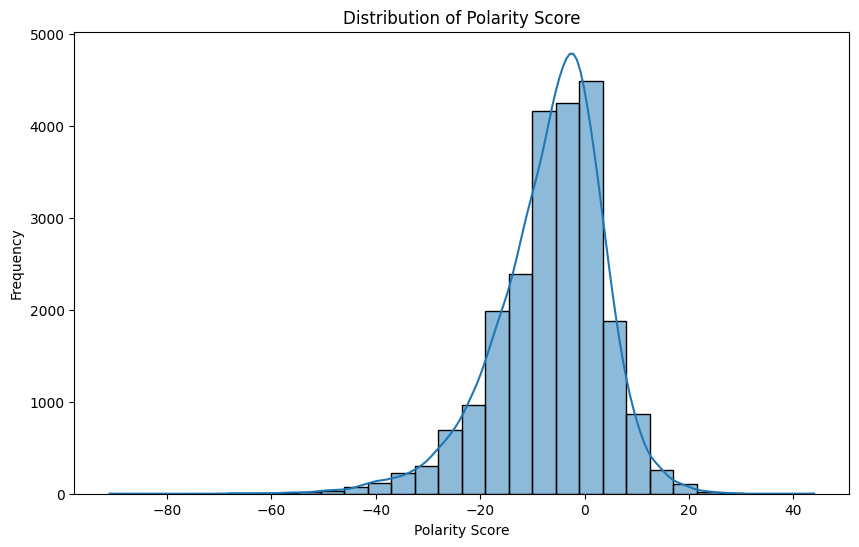

In [22]:
# Menampilkan distribusi polarity_score dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['polarity_score'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

## Menampilkan diagram lingkaran untuk memudahkan visualisasi pembagian dataset.

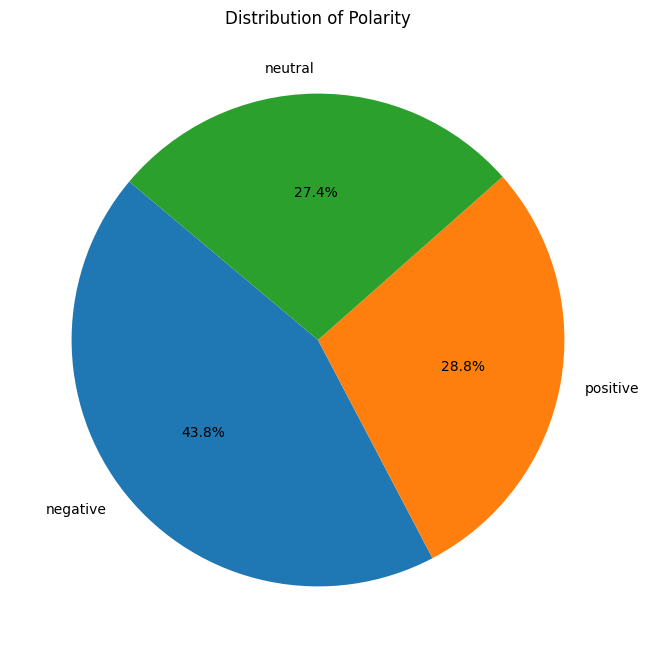

In [23]:
# Hitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Polarity')
plt.show()


## Word cloud umum

## Membuat wordcloud dari dataset tanpa melihat label.

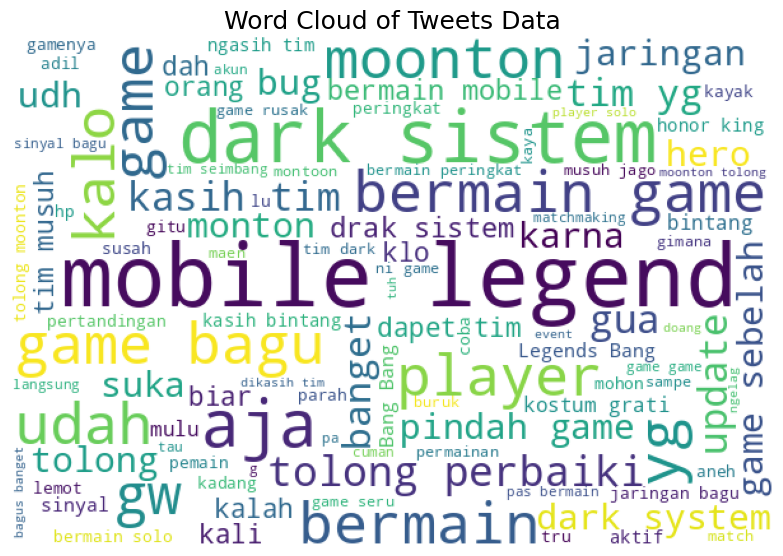

In [32]:
# Membuat wordcloud secara umum

list_words = ''

for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## Word cloud positive

In [33]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

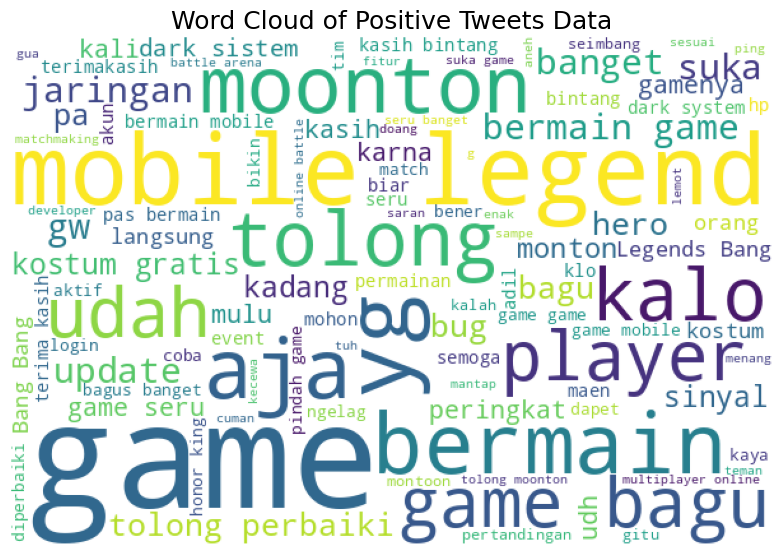

In [34]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## Word cloud negative

In [27]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

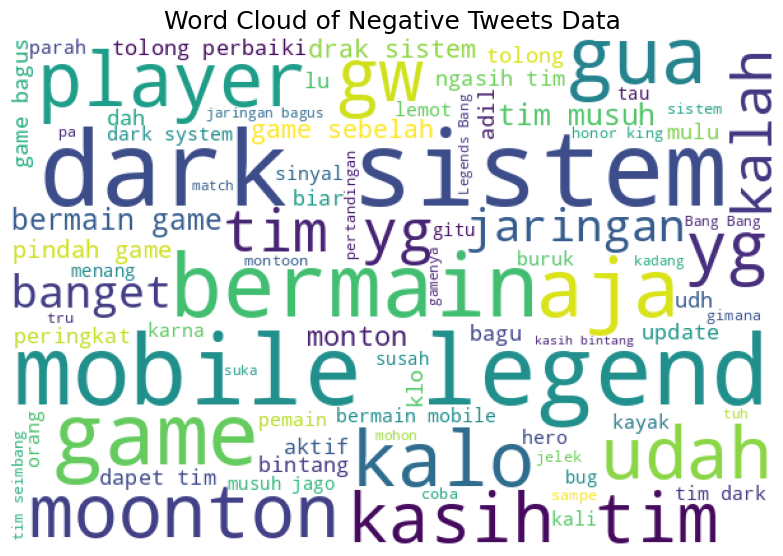

In [28]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## word cloud neutral

In [29]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

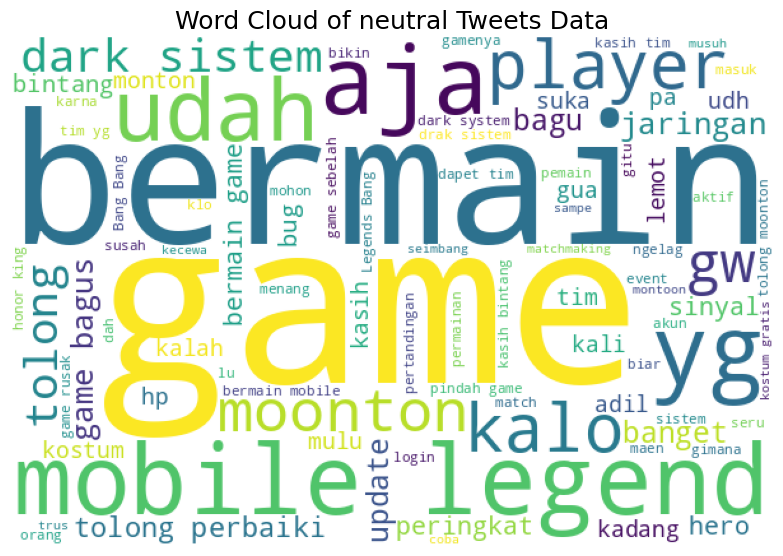

In [30]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

# Visualisasi dataset

## Menampilkan distribusi dari panjang text.

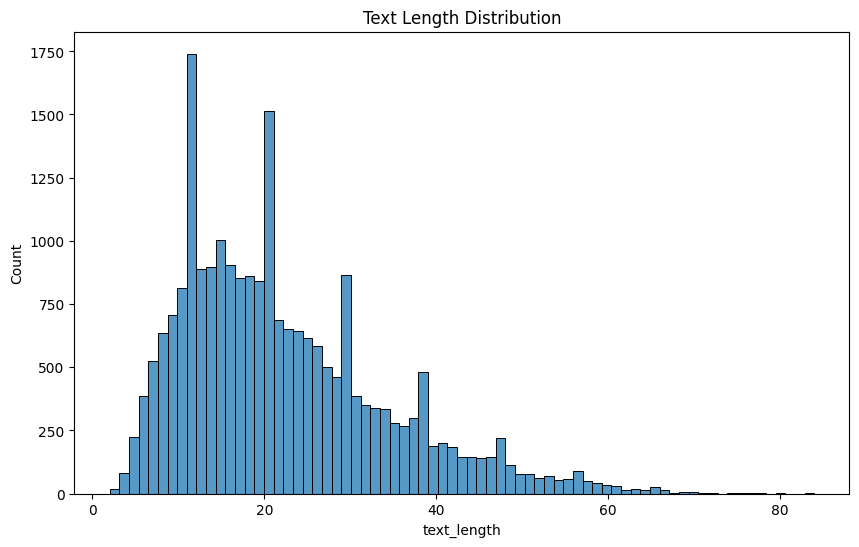

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

## Menampilkan kata yang paling sering muncul.

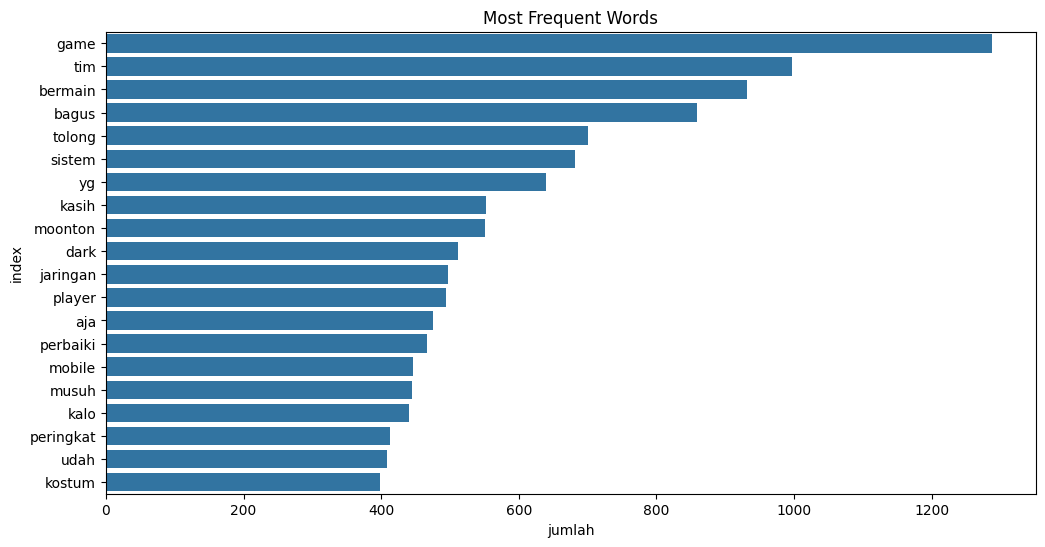

In [36]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Modeling

Pembuatan model dengan melakukan tiga percobaan skema pelatihan yang berbeda dan dibedakan dengan variasi dari dua kombinasi seperti berikut:

- Model 1
  - Algoritma Pelatihan: CNN
  - Pembagian Data: Training 80, val 10, test 10
- Model 2
  - Algoritma Pelatihan: LSTM
  - Pembagian Data: Training 70, val 20, test 10
- Model 3
  - Algoritma Pelatihan: GRU
  - Pembagian Data: Training 90, val 5, test 5

Kolom text_akhir dijadikan sebagai fitur dan kolom polarity dijadikan sebagai target.

In [37]:
# Mengambil kolom text_akhir dan polarity
X = clean_df['text_akhir']
y = clean_df['polarity']

Melakukan tokenisasi.

In [38]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

## Mendefinisikan callbacks yang akan berhenti jika nilai akurasi pelatihan > 0.95.

In [39]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.92:
            print(f"\nVal accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True
early_stopping = CustomCallback()

# Model 1 - CNN

In [40]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

In [41]:
# Membangun model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_CNN = model_CNN.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_CNN, y_val_CNN))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 - 64s - 7s/step - accuracy: 0.4586 - loss: 1.0308 - val_accuracy: 0.5566 - val_loss: 0.9412
Epoch 2/50
9/9 - 60s - 7s/step - accuracy: 0.5929 - loss: 0.8742 - val_accuracy: 0.6611 - val_loss: 0.7914
Epoch 3/50
9/9 - 73s - 8s/step - accuracy: 0.6658 - loss: 0.7334 - val_accuracy: 0.7035 - val_loss: 0.6547
Epoch 4/50
9/9 - 72s - 8s/step - accuracy: 0.7206 - loss: 0.6308 - val_accuracy: 0.7599 - val_loss: 0.5943
Epoch 5/50
9/9 - 82s - 9s/step - accuracy: 0.7646 - loss: 0.5504 - val_accuracy: 0.7936 - val_loss: 0.5102
Epoch 6/50
9/9 - 81s - 9s/step - accuracy: 0.8092 - loss: 0.4659 - val_accuracy: 0.7892 - val_loss: 0.4993
Epoch 7/50
9/9 - 42s - 5s/step - accuracy: 0.8401 - loss: 0.4056 - val_accuracy: 0.8273 - val_loss: 0.4206
Epoch 8/50
9/9 - 83s - 9s/step - accuracy: 0.8699 - loss: 0.3474 - val_accuracy: 0.8308 - val_loss: 0.3952
Epoch 9/50
9/9 - 81s - 9s/step - accuracy: 0.8817 - loss: 0.3187 - val_accuracy: 0.8426 - val_loss: 0.3770
Epoch 10/50
9/9 - 82s - 9s/step - accuracy: 0.90

In [42]:
# Evaluasi model
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2,batch_size=1028)
print("Test score: %.2f" % (score_CNN))
print("Test accuracy: %.2f" % (acc_CNN))

3/3 - 2s - 622ms/step - accuracy: 0.8466 - loss: 1.1060
Test score: 1.11
Test accuracy: 0.85


In [43]:
model_CNN.save('model_CNN.h5')

# Model 2 - LSTM

In [44]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [45]:
# Membangun model LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=30, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/30
8/8 - 58s - 7s/step - accuracy: 0.4707 - loss: 5.6946 - val_accuracy: 0.5184 - val_loss: 4.9799
Epoch 2/30
8/8 - 78s - 10s/step - accuracy: 0.5293 - loss: 4.5232 - val_accuracy: 0.5826 - val_loss: 3.9424
Epoch 3/30
8/8 - 49s - 6s/step - accuracy: 0.6246 - loss: 3.5643 - val_accuracy: 0.6509 - val_loss: 3.0791
Epoch 4/30
8/8 - 84s - 10s/step - accuracy: 0.6771 - loss: 2.7719 - val_accuracy: 0.7073 - val_loss: 2.3880
Epoch 5/30
8/8 - 82s - 10s/step - accuracy: 0.6397 - loss: 2.3299 - val_accuracy: 0.6281 - val_loss: 2.1145
Epoch 6/30
8/8 - 81s - 10s/step - accuracy: 0.6668 - loss: 1.8937 - val_accuracy: 0.6734 - val_loss: 1.7001
Epoch 7/30
8/8 - 82s - 10s/step - accuracy: 0.7187 - loss: 1.5392 - val_accuracy: 0.7350 - val_loss: 1.3979
Epoch 8/30
8/8 - 82s - 10s/step - accuracy: 0.7700 - loss: 1.2546 - val_accuracy: 0.7608 - val_loss: 1.1499
Epoch 9/30
8/8 - 49s - 6s/step - accuracy: 0.7731 - loss: 1.0443 - val_accuracy: 0.7562 - val_loss: 1.0024
Epoch 10/30
8/8 - 50s - 6s/step

In [46]:
# Evaluasi model
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % (score_LSTM))
print("Test accuracy: %.2f" % (acc_LSTM))

72/72 - 4s - 55ms/step - accuracy: 0.8645 - loss: 0.4256
Test score: 0.43
Test accuracy: 0.86


In [47]:
model_LSTM.save('model_LSTM.h5')

# Model 3 - GRU

In [48]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.0526, random_state=42)

In [49]:
# Membangun model GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(Bidirectional(GRU(64, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(num_classes, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 1028
history_GRU = model_GRU.fit(X_train_GRU, y_train_GRU, epochs=20, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU),callbacks=[early_stopping])

Epoch 1/20
21/21 - 148s - 7s/step - accuracy: 0.4562 - loss: 3.1420 - val_accuracy: 0.6159 - val_loss: 2.4767
Epoch 2/20
21/21 - 142s - 7s/step - accuracy: 0.6150 - loss: 2.1507 - val_accuracy: 0.6658 - val_loss: 1.7515
Epoch 3/20
21/21 - 137s - 7s/step - accuracy: 0.7020 - loss: 1.5195 - val_accuracy: 0.7314 - val_loss: 1.2684
Epoch 4/20
21/21 - 147s - 7s/step - accuracy: 0.7803 - loss: 1.0941 - val_accuracy: 0.7953 - val_loss: 0.9516
Epoch 5/20
21/21 - 145s - 7s/step - accuracy: 0.8379 - loss: 0.8079 - val_accuracy: 0.8136 - val_loss: 0.8106
Epoch 6/20
21/21 - 133s - 6s/step - accuracy: 0.8568 - loss: 0.6594 - val_accuracy: 0.8206 - val_loss: 0.6618
Epoch 7/20
21/21 - 150s - 7s/step - accuracy: 0.8780 - loss: 0.5418 - val_accuracy: 0.8609 - val_loss: 0.5326
Epoch 8/20
21/21 - 135s - 6s/step - accuracy: 0.8927 - loss: 0.4578 - val_accuracy: 0.8591 - val_loss: 0.4777
Epoch 9/20
21/21 - 141s - 7s/step - accuracy: 0.8994 - loss: 0.4116 - val_accuracy: 0.8390 - val_loss: 0.5098
Epoch 10/2

In [50]:
# Evaluasi model
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test score: %.2f" % (score_GRU))
print("Test accuracy: %.2f" % (acc_GRU))

36/36 - 3s - 72ms/step - accuracy: 0.8619 - loss: 0.4748
Test score: 0.47
Test accuracy: 0.86


In [51]:
# Menyimpan model
model_GRU.save('model_GRU.h5')

# Evaluasi model

In [52]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Accuracy Train': [history_LSTM.history['accuracy'][-1], history_CNN.history['accuracy'][-1],history_GRU.history['accuracy'][-1]],
    'Accuracy Test': [acc_LSTM, acc_CNN,acc_GRU]
})
results_df

,Model,Accuracy Train,Accuracy Test
0,LSTM,0.933662,0.864510
1,CNN,0.997868,0.846591
2,GRU,0.953848,0.861888


# Predict

In [59]:
# Contoh data baru
new_texts = [
    "sangat suka main Mobile Legends, hero baru seperti Arlott dan skillnya keren banget! Grafiknya juga makin bagus setelah update terakhir. Harapannya ke depan lebih banyak event seru dan skin murah.",
    "mobile legends dark sistem, jelek, gak bagus",
    "hero Mobile Legends ada banyak yang kuat seperti Marksman dan Mage. Tapi kadang rotasi meta membuat gameplay terasa monoton. Bagus kalau ada update lebih sering."
]

# Nilai asli dari teks
true_labels = ["positive", "negative", "neutral"]

# Tokenisasi teks baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_CNN = model_CNN.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi menjadi label
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_CNN = np.argmax(predictions_CNN, axis=1)
predicted_labels_GRU = np.argmax(predictions_GRU, axis=1)

predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, predicted_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Text: sangat suka main Mobile Legends, hero baru seperti Arlott dan skillnya keren banget! Grafiknya juga makin bagus setelah update terakhir. Harapannya ke depan lebih banyak event seru dan skin murah.
True Label: positive
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): positive

Text: mobile legends dark sistem, jelek, gak bagus
True Label: negative
Predicted Label (LSTM): negative
Predicted Label (CNN): negative
Predicted Label (GRU): negative

Text: hero Mobile Legends ada banyak yang kuat seperti Marksman dan Mage. Tapi kadang rotasi meta membuat gameplay terasa monoton. Bagus kalau ada update lebih sering.
True Label: neutral
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): neutral

